## - 언더 샘플링
- 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수준으로 감소
- 데이터 불균형 문제는 피할 수 있지만 전체 데이터 수가 급격하게 줄어들어 학습성능을 떨어트림

In [3]:
!pip install imbalanced_learn
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

#분류용 가상데이터 생성
#표본데이터 수 : 2000개, 독립변수 수 : 6개
x, y=make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
#y->0:1900개, 1:100개
print(Counter(y))

Counter({0: 1900, 1: 100})


You should consider upgrading via the 'c:\users\taeeu\anaconda3\python.exe -m pip install --upgrade pip' command.


## 랜덤언더샘플링

In [7]:
#sampling_strategy='majority' : 다수의 레이블의 데이터를 샘플링하여 소수 레이블의 데이터 수와 동일하게 줄임
undersample=RandomUnderSampler(sampling_strategy='majority')
x_under, y_under=undersample.fit_resample(x,y)

#y->0:100개, 1:100개
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [9]:
#데이터 수가 해당비율이 되도록 조정
undersample=RandomUnderSampler(sampling_strategy=0.5)
x_under2, y_under2=undersample.fit_resample(x,y)

print(Counter(y_under2))

Counter({0: 200, 1: 100})


## - 오버샘플링
- 다수 레이블을 지닌 데이터세트의 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보
- 데이터의 손실이 없어 언더샘플링보다 성능이 유리

In [11]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.5)
x_over, y_over=oversample.fit_resample(x,y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [13]:
oversample=RandomOverSampler(sampling_strategy='minority')
x_over, y_over=oversample.fit_resample(x,y)
print(Counter(y_over))

Counter({0: 1900, 1: 1900})


## 오버샘플링-SMOTE 방식
- 소수 레이블을 지닌 데이터 세트의 관측값에 대한 K개의 최근접 이웃을 찾고 새로운 데이터를 생성

In [15]:
from imblearn.over_sampling import SMOTE
smote_sample=SMOTE(sampling_strategy='minority')
x_sm, y_sm=smote_sample.fit_resample(x,y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


C:\Users\taeeu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\taeeu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\taeeu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


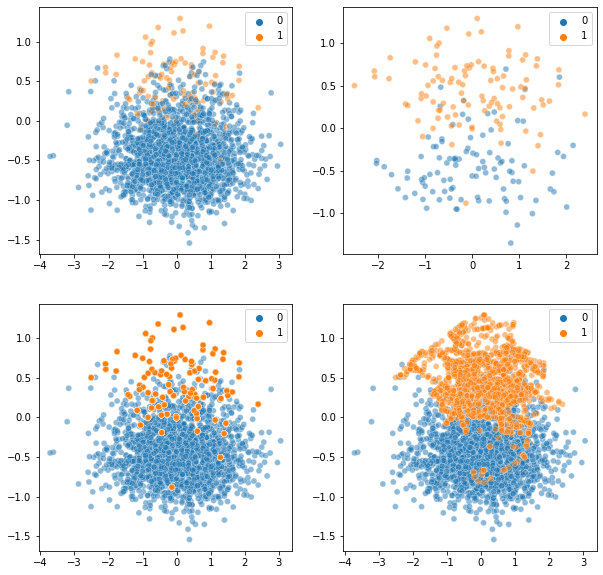

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,10))
sns.scatterplot(x[:,1], x[:,2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x_under[:,1], x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x_over[:,1], x_over[:,2], hue=y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x_sm[:,1], x_sm[:,2], hue=y_sm, ax=axes[1][1], alpha=0.5)
plt.show()